In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import gdown 
from pandas.plotting import scatter_matrix


#### Reading solar farm data

In [22]:
# Download and read togo solar farm dataset
gdown.download("https://drive.google.com/uc?id=1jEtxsgACzSdj6gQjG102gKZnZILHvIz8", output="../data/togo-dataset.csv", quiet=False)
togo_df = pd.read_csv("../data/togo-dataset.csv")


Downloading...
From: https://drive.google.com/uc?id=1jEtxsgACzSdj6gQjG102gKZnZILHvIz8
To: /Users/yo/Documents/solar-farm-eda-and-statistical-analysis/data/togo-dataset.csv
100%|██████████| 49.9M/49.9M [00:05<00:00, 8.39MB/s]


In [23]:
togo_df.head(3)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN

#### Summary Statistics

In [42]:
togo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [43]:
# Calculating statistical measures and informations for Togo dataset
togo_df.select_dtypes(include=["number"]).describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

#### Data Quality Check

**Checking for Missing Values**

As we can see below the only feature with missing values is `Comments`. 100% of the data ar null.
Decision: Since handling features with significant missing values lead the model to overfiting and miss learning we
can drop it.

In [44]:
# Missing values in Togo dataset
togo_df.isnull().sum()[togo_df.isnull().sum() > 0] / len(togo_df) * 100

Comments    100.0
dtype: float64

**Checking for outliers**

In [47]:
# Checking for outliers with IQR method
def detect_outlier_iqr(df: pd.DataFrame): 
    outlier_col = {}
    for col in df.select_dtypes('number'):
        q1 = df[col].abs().quantile(0.25)
        q3 = df[col].abs().quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Get the outliers
        outlier_col[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count() / df[col].count() * 100
    return outlier_col

# Outliers in Togo dataset
# Outliers in Benin dataset
outliers = detect_outlier_iqr(togo_df)
print('Outlier percentage for each features:')
for col, percent in outliers.items():
    if percent > 0:
        print(f"{col}: {percent:.2f}%")

Outlier percentage for each features:
GHI: 0.27%
DNI: 9.62%
DHI: 1.50%
ModA: 0.24%
ModB: 0.29%
WS: 1.66%
WSgust: 1.40%
WSstdev: 2.79%
WDstdev: 1.32%
BP: 3.66%
Cleaning: 0.05%
Precipitation: 0.64%
TModA: 0.03%
TModB: 0.11%


**Checking Incorrect Entries**

In [28]:
# Checking all have numeric data types 
print('Non numeric datatype in Togo dataset: ', togo_df.select_dtypes('object').columns)

Non numeric datatype in Togo dataset:  Index(['Timestamp'], dtype='object')


In [48]:
# Checking for incorrect entries values
def detect_out_of_range(df: pd.DataFrame):
    out_of_range = {}
    for col in df.select_dtypes('number'):
        count = df[(df[col] < 0)][col].count() 
        if count > 0:
            out_of_range[col] = df[(df[col] < 0)][col].count() / df.shape[0] * 100
    return out_of_range

# Out-of-range values in Togo dataset
off_ranges =  detect_out_of_range(togo_df)
print('Out-of-range percentage for each features:')
for col, percent in off_ranges.items():
    print(f"{col}: {percent:.2f}%")

Out-of-range percentage for each features:
GHI: 48.97%


In [30]:

# Identify duplicate
# Identify duplicate rows in Togo dataset
print('Duplicat columns in togo dataset: ', togo_df.duplicated().sum())

Duplicat columns in togo dataset:  0


#### Time Series Analysis

Monthly Patterns of GHI, DNI, DHI, and Tamb python Copy code

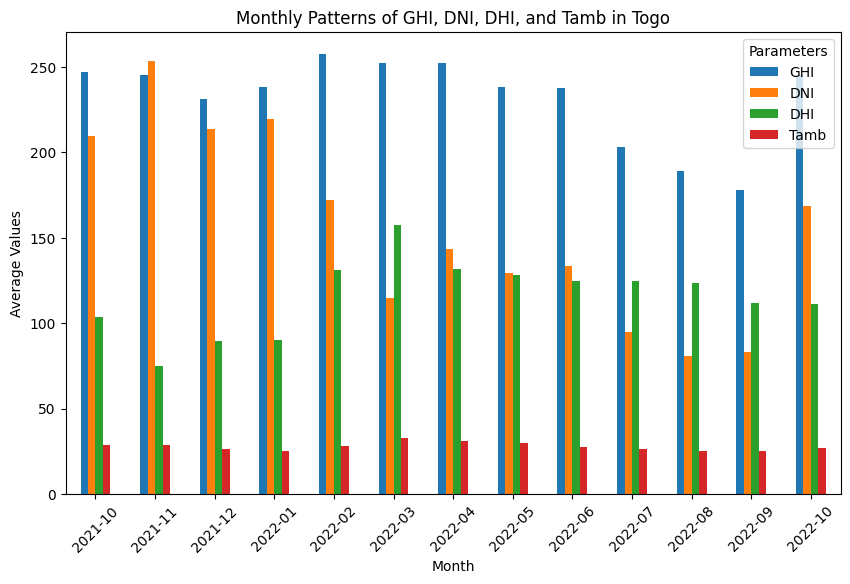

In [31]:
def monthly_trend(df, title):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Group by Month (using Timestamp)
    monthly_data = df.groupby(df['Timestamp'].dt.to_period('M'))[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

    # Plot
    monthly_data.plot(kind='bar', figsize=(10, 6), title=title)
    plt.ylabel('Average Values')
    plt.xlabel('Month')
    plt.xticks(rotation=45)  # Rotate x-axis for better visibility
    plt.legend(title='Parameters')
    plt.show()

# Monthly trend for Togo dataset
monthly_trend(togo_df, 'Monthly Patterns of GHI, DNI, DHI, and Tamb in Togo')


Daily Trends of Solar Irradiance and Temperature

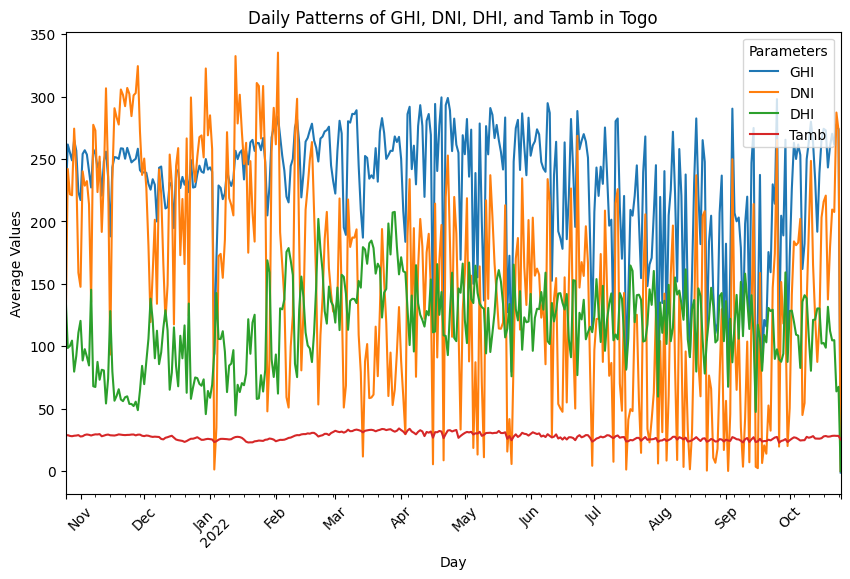

In [32]:
def daily_trend(df, title):
    # Group by Day (using Timestamp)
    daily_data = df.groupby(df['Timestamp'].dt.to_period('D'))[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

    # Plot
    daily_data.plot(kind='line', figsize=(10, 6), title=title)
    plt.ylabel('Average Values')
    plt.xlabel('Day')
    plt.xticks(rotation=45)  # Rotate x-axis for better visibility
    plt.legend(title='Parameters')
    plt.show()

# Daily trend for Togo dataset
daily_trend(togo_df, 'Daily Patterns of GHI, DNI, DHI, and Tamb in Togo')

Impact of Cleaning on Sensor Readings Over Time

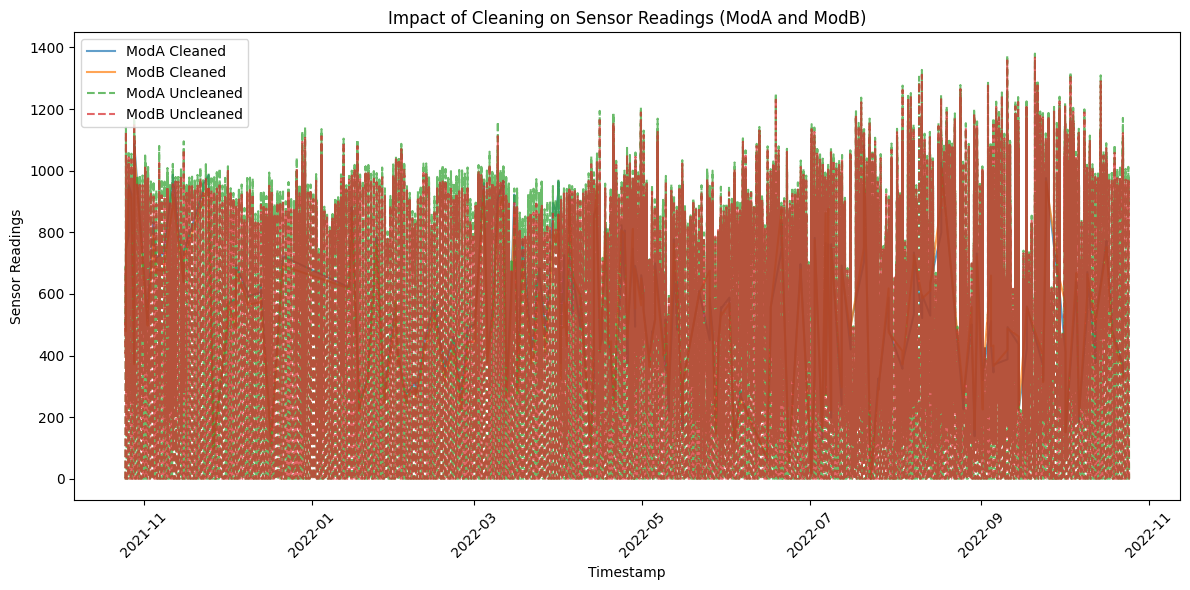

In [33]:
def cleaning_impact_over_time(df):
    # Filter data by Cleaning status
    cleaned_data = df[df['Cleaning'] == 1]
    uncleaned_data = df[df['Cleaning'] == 0]

    # Plot Cleaned vs. Uncleaned ModA and ModB
    plt.figure(figsize=(12, 6))

    # Cleaned Data
    plt.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA Cleaned', alpha=0.7)
    plt.plot(cleaned_data['Timestamp'], cleaned_data['ModB'], label='ModB Cleaned', alpha=0.7)

    # Uncleaned Data
    plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA Uncleaned', alpha=0.7, linestyle='--')
    plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModB'], label='ModB Uncleaned', alpha=0.7, linestyle='--')

    plt.legend()
    plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB)')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Readings')
    plt.xticks(rotation=45)  # Rotate timestamps for better visibility
    plt.tight_layout()
    plt.show()

# Cleaning impact over time for Togo dataset
cleaning_impact_over_time(togo_df)


#### Correlation Analysis

In [34]:
rad_components = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
temp_measures = ['TModA', 'TModB']
wind_conditions = ['WS', 'WD', 'WSgust']


**Correlation analysis between irradiation components and temprature measures**

In [35]:
# Correlation analysis for Togo dataset
# sns.pairplot(togo_df[rad_components + temp_measures])
# plt.show()
togo_df[rad_components + temp_measures].corr()

GHI       DNI       DHI     TModA     TModB     TModA     TModB
GHI    1.000000  0.877293  0.852080  0.898211  0.919220  0.898211  0.919220
DNI    0.877293  1.000000  0.532717  0.765881  0.783572  0.765881  0.783572
DHI    0.852080  0.532717  1.000000  0.802319  0.820360  0.802319  0.820360
TModA  0.898211  0.765881  0.802319  1.000000  0.985069  1.000000  0.985069
TModB  0.919220  0.783572  0.820360  0.985069  1.000000  0.985069  1.000000
TModA  0.898211  0.765881  0.802319  1.000000  0.985069  1.000000  0.985069
TModB  0.919220  0.783572  0.820360  0.985069  1.000000  0.985069  1.000000

**Scatter matrix analysis between solar irradiance and wind conditions**

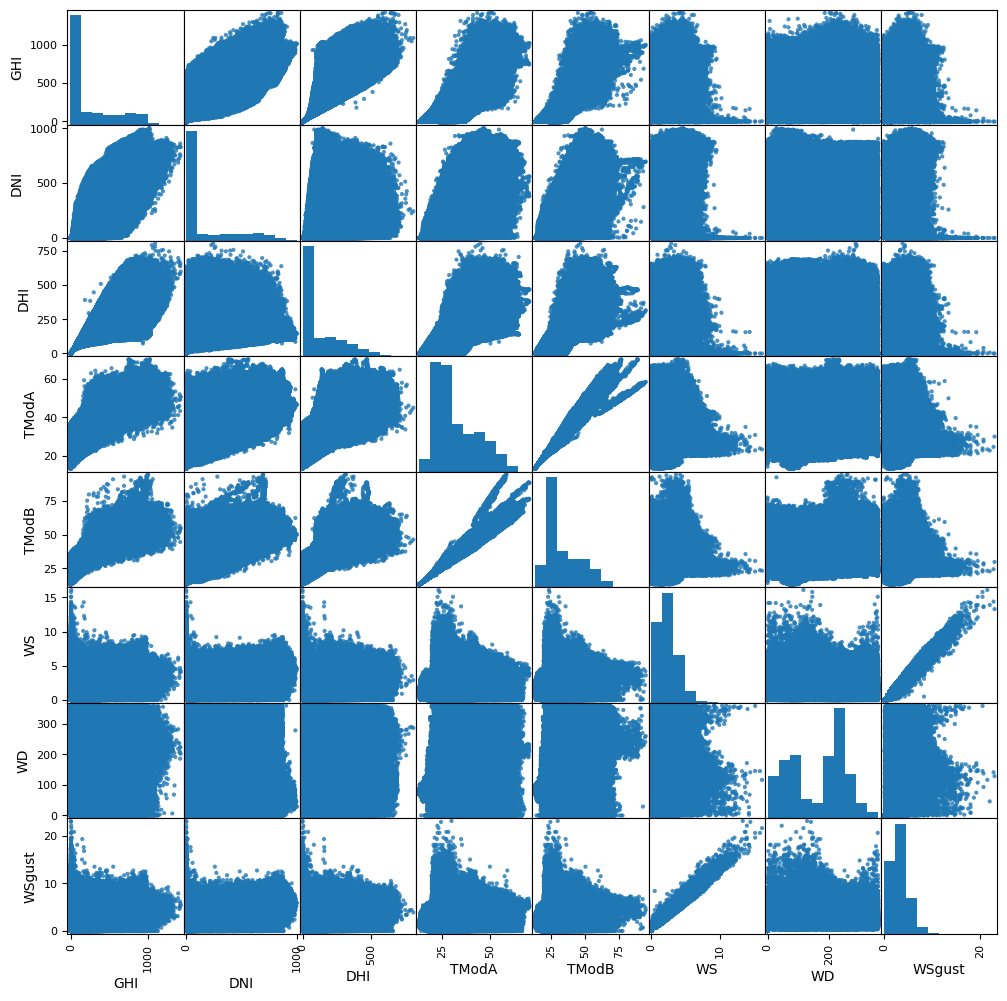

In [36]:
# Correlation analysis for Togo dataset
scatter_matrix(togo_df[rad_components + wind_conditions], alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.show()

#### Wind Analysis

/var/folders/jn/0b_xwd412532nmd6152zbw1w0000gp/T/ipykernel_2018/1823528179.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_summary = togo_df.groupby(direction_bins)['WS'].mean()


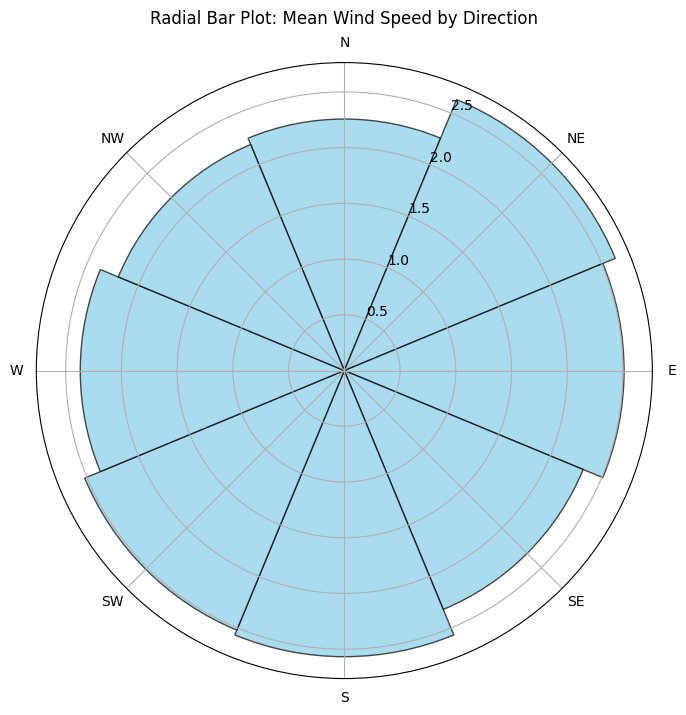

In [37]:
# Aggregate wind togo_df by direction bins
direction_bins = pd.cut(togo_df['WD'], bins=np.arange(0, 361, 45), labels=np.arange(0, 360, 45))
wind_summary = togo_df.groupby(direction_bins)['WS'].mean()

# Radial bar plot togo_df
angles = np.deg2rad(np.arange(0, 360, 45))  # Convert to radians
values = wind_summary.values

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
bars = ax.bar(angles, values, width=np.pi/4, color="skyblue", edgecolor="black", alpha=0.7)

# Customizing plot
ax.set_theta_zero_location('N')  # North at the top
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_xticks(angles)
ax.set_xticklabels(["N", "NE", "E", "SE", "S", "SW", "W", "NW"])
plt.title("Radial Bar Plot: Mean Wind Speed by Direction", va='bottom')
plt.show()

#### Temperature Analysis

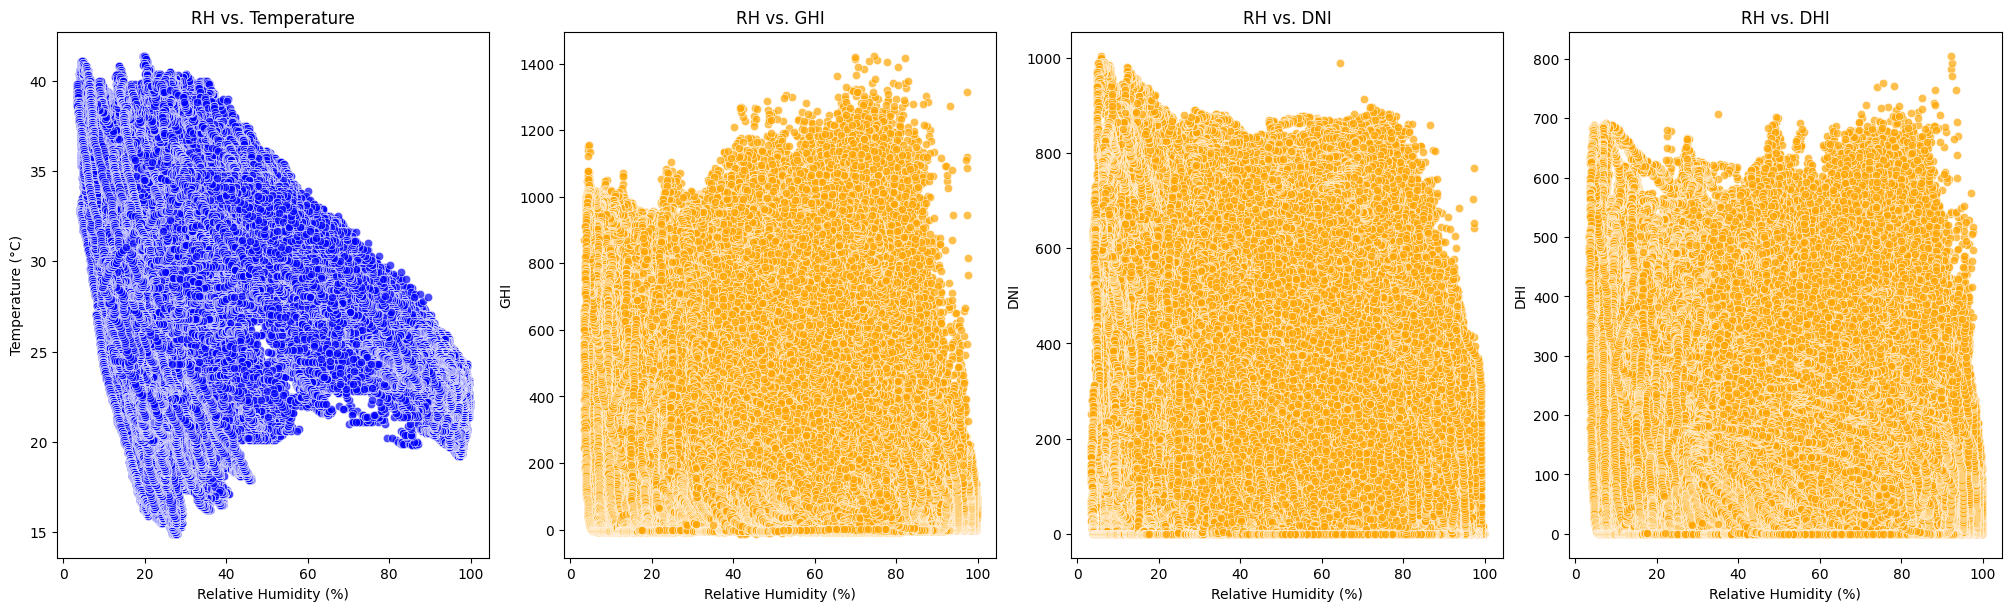

In [38]:
def plot_scatter(df):
    # Define variables
    solar_vars = ['GHI', 'DNI', 'DHI']  # Solar radiation variables
    temperature_var = 'Tamb'
    humidity_var = 'RH'

    # Set up the horizontal layout for subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(solar_vars) + 1, figsize=(5 * (len(solar_vars) + 1), 6), constrained_layout=True)

    # Plot RH vs. Temperature
    sns.scatterplot(x=df[humidity_var], y=df[temperature_var], ax=axes[0], color='blue', alpha=0.7)
    axes[0].set_title('RH vs. Temperature')
    axes[0].set_xlabel('Relative Humidity (%)')
    axes[0].set_ylabel('Temperature (°C)')

    # Plot RH vs. each Solar Radiation variable
    for i, solar_var in enumerate(solar_vars):
        sns.scatterplot(x=df[humidity_var], y=df[solar_var], ax=axes[i + 1], color='orange', alpha=0.7)
        axes[i + 1].set_title(f'RH vs. {solar_var}')
        axes[i + 1].set_xlabel('Relative Humidity (%)')
        axes[i + 1].set_ylabel(solar_var)

    plt.show()

# Scatter plot for Togo dataset
plot_scatter(togo_df)

#### Frequency Distribution of irradation and temprature

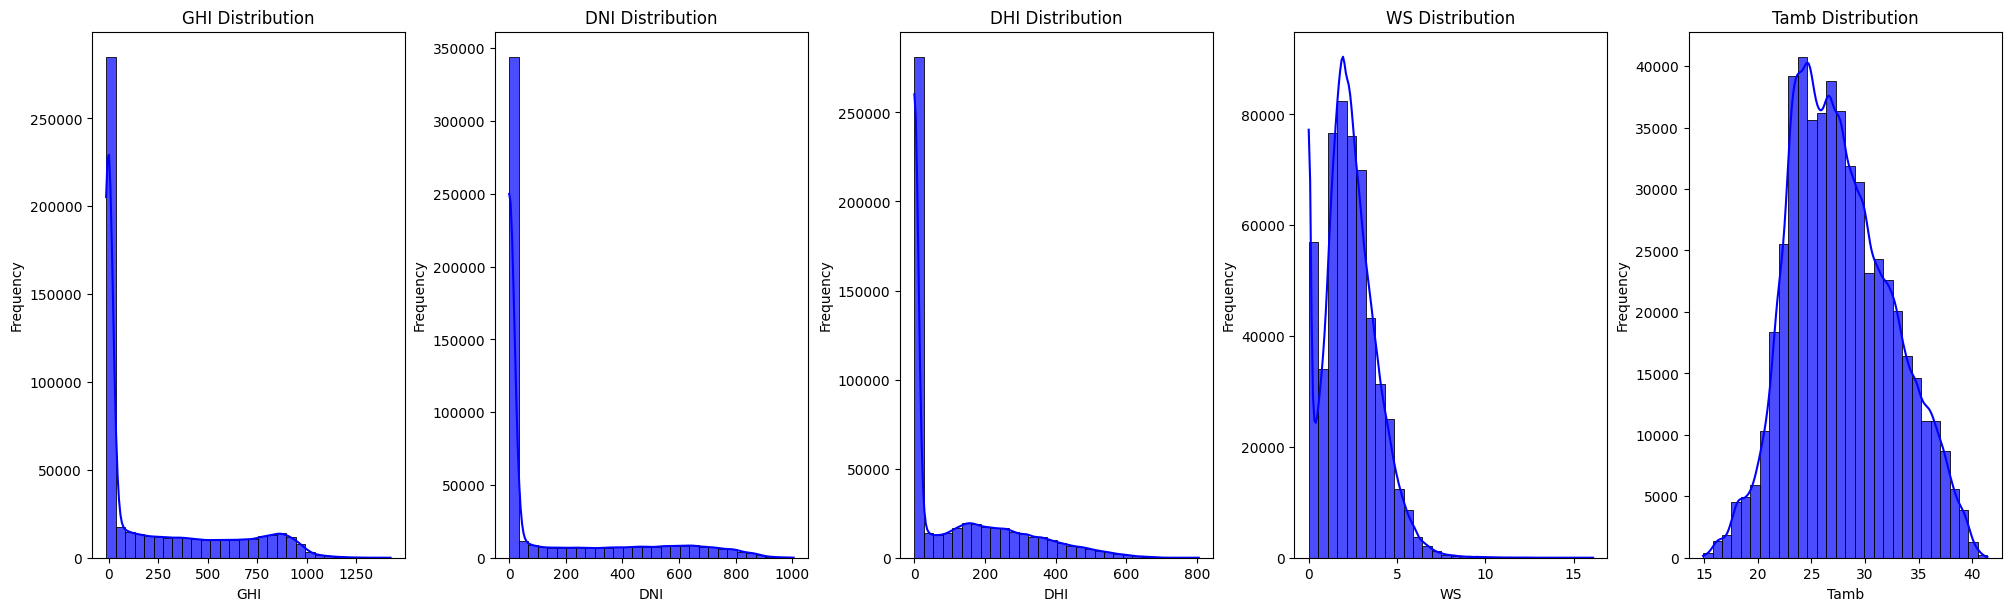

In [39]:
def frequency_distribution(df):

    # Define the variables to plot histograms for
    variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']  # Update with your column names

    # Set up the horizontal layout for subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(4 * len(variables), 6), constrained_layout=True)

    # Loop through the variables and plot histograms
    for ax, var in zip(axes, variables):
        sns.histplot(df[var], bins=30, kde=True, ax=ax, color='blue', alpha=0.7)
        ax.set_title(f'{var} Distribution', fontsize=12)
        ax.set_xlabel(var, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

    plt.show()
    
# Frequency distribution for Togo dataset
frequency_distribution(togo_df)

#### Z-Score Analysis

In [40]:
def z_score(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=np.number)

    # Calculate Z-scores for all numeric columns
    z_scores = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()
    anomalies = (z_scores.abs() > 3)

    return anomalies.sum()[anomalies.sum() > 0]

# Z-scores for Togo dataset
print('Z-scores for Togo dataset: ', z_score(togo_df))

Z-scores for Togo dataset:  GHI               305
DNI              1062
DHI              3415
ModA              137
ModB              206
WS               3510
WSgust           3915
WSstdev          5753
WDstdev          3362
BP               1019
Cleaning          281
Precipitation    3338
TModA             153
TModB             609
dtype: int64


#### Explor complete relationship with Bubble charts

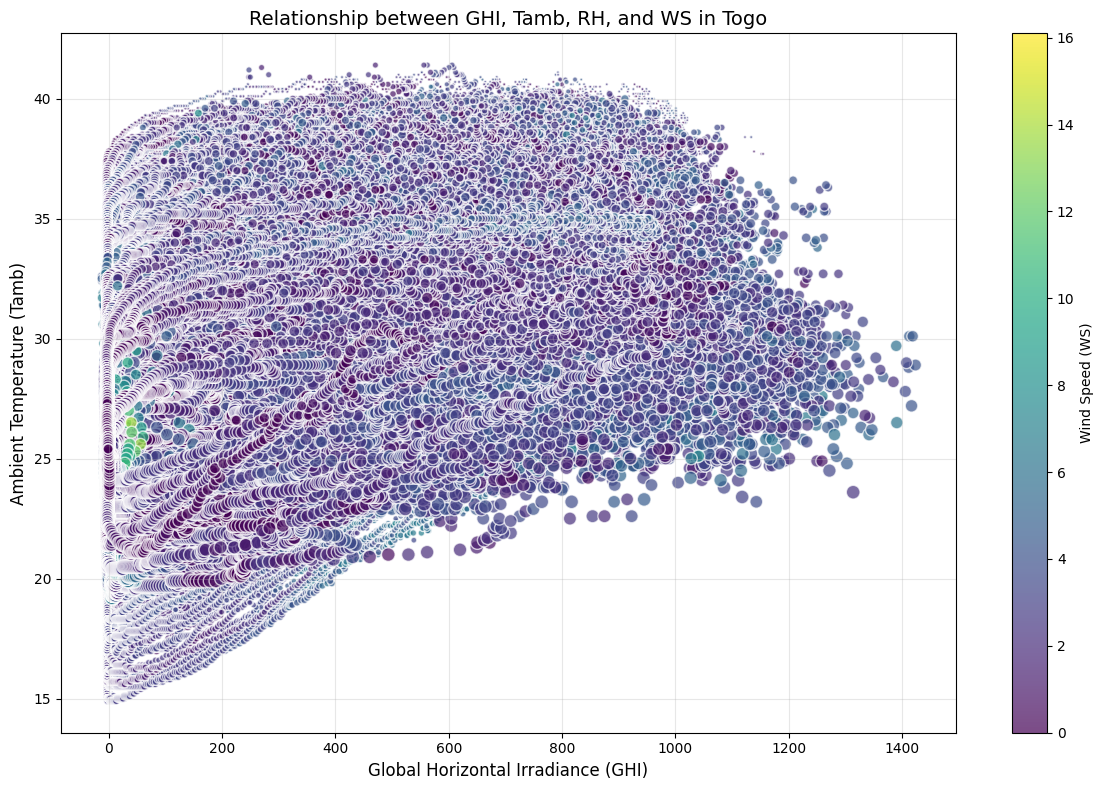

In [41]:
def explor_relationship(df, title):

    # Example variables in your dataset
    x = df['GHI']       
    y = df['Tamb']      
    bubble_size = df['RH']  
    color = df['WS']     

    # Scale bubble sizes for better visibility
    scaled_bubble_size = bubble_size / bubble_size.max() * 100

    # Create the bubble chart
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x, y, s=scaled_bubble_size, c=color, cmap='viridis', alpha=0.7, edgecolors='w')

    # Add a color bar to show the wind speed
    cbar = plt.colorbar(scatter)
    cbar.set_label('Wind Speed (WS)')

    # Set chart title and axis labels
    plt.title(title, fontsize=14)
    plt.xlabel('Global Horizontal Irradiance (GHI)', fontsize=12)
    plt.ylabel('Ambient Temperature (Tamb)', fontsize=12)

    # Show the plot
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Relationship between GHI, Tamb, RH, and WS in Togo dataset
explor_relationship(togo_df, 'Relationship between GHI, Tamb, RH, and WS in Togo')

#### Data Cleaning

**Handling Missing Values**

In [45]:
# Droping Comment Feature
togo_df.drop(columns='Comments', axis=1, inplace=True)